In [1]:
import numpy as np
from math import sqrt, acos, degrees, isclose

def myConvexHull(points):
  hull_simplices = []
  # array diurutkan membesar
  sortedPoints = points[points[:,1].argsort()] # sort by ordinat
  sortedPoints = sortedPoints[sortedPoints[:,0].argsort(kind='mergesort')] # sort by absis

  # titik terkecil dan terbesar akan menjadi titik dalam convex hull
  p1 = sortedPoints[0]
  p2 = sortedPoints[len(sortedPoints)-1]
  temp = [findIndex(points,p1), findIndex(points,p2)]
  hull_simplices.append(temp)

  # bagi kumpulan titik selain p1 dan p2 menjadi 2 bagian
  a = [] # kumpulan titik di sebelah kiri atau bagian atas
  b = [] # kumpulan titik di sebelah kanan atau bagian bawah
  for i in range(len(sortedPoints)):
    if (not((sortedPoints[i][0] == p1[0] and sortedPoints[i][1] == p1[1]) or (sortedPoints[i][0] == p2[0] and sortedPoints[i][1] == p2[1]))):
      if (determinan(p1, p2, sortedPoints[i]) > 0):
        a.append(sortedPoints[i])
      elif (determinan(p1, p2, sortedPoints[i]) < 0):
        b.append(sortedPoints[i])
  
  # mencari convex hull bagian kiri dan kanan
  hull_simplices = findConvexHull(points,a,p1,p2,True, hull_simplices)
  hull_simplices = findConvexHull(points,b,p1,p2,False, hull_simplices)

  return hull_simplices

def findConvexHull(points_in,points,p1,p2,kiri,simplices):
  if (len(points) == 0):
    return simplices
  else:
    # cari sebuah titik yang memiliki jarak terjauh dari garis p1p2
    pmax = farthestPoint(points,p1,p2)

    # hapus simplices p1 p2 dan tambahkan simplices p1 pmax dan pmax p2
    idx_p1 = findIndex(points_in,p1)
    idx_p2 = findIndex(points_in,p2)
    idx_pmax = findIndex(points_in,pmax)
    prevSimplices = [idx_p1, idx_p2]
    idx_prevSimplices = findIndex(simplices,prevSimplices)
    if (idx_prevSimplices == -1): # jika tidak ditemukan, coba cari dengan urutan terbalik
      prevSimplices = [idx_p2, idx_p1]
      idx_prevSimplices = findIndex(simplices,prevSimplices)
    if (idx_prevSimplices != -1): # belum dihapus dari simplices
      simplices = (np.delete(np.array(simplices), idx_prevSimplices, axis=0)).tolist()
    temp1_1 = [idx_p1,idx_pmax]
    temp1_2 = [idx_pmax,idx_p1]
    temp2_1 = [idx_pmax,idx_p2]
    temp2_2 = [idx_p2,idx_pmax]
    # tambahkan ke simplices jika belum ada
    if (findIndex(simplices,temp1_1) == -1 and findIndex(simplices,temp1_2) == -1): # belum ada di simplices
      simplices.append(temp1_1)
    if (findIndex(simplices,temp2_1) == -1 and findIndex(simplices,temp2_2) == -1): # belum ada di simplices
      simplices.append(temp2_1)

    # bagi kumpulan titik selain pmax menjadi 2 bagian
    a = [] # kumpulan titik di sebelah kiri/kanan garis p1 pmax
    b = [] # kumpulan titik di sebelah kiri/kanan garis pmax p2
    # jika kumpulan titik masukan berada di sebelah kiri garis p1 p2, maka akan dicari convex hull bagian kiri dari p1 pmax dan pmax p2
    if kiri: 
      for i in range(len(points)):
        if (points[i][0] != pmax[0] or points[i][1] != pmax[1]):
          if (determinan(p1, pmax, points[i]) > 0):
            a.append(points[i])
          elif (determinan(pmax, p2, points[i]) > 0):
            b.append(points[i])
      # mencari convex hull secara rekursif
      simplices = findConvexHull(points_in,a,p1,pmax,True,simplices)
      simplices = findConvexHull(points_in,b,pmax,p2,True,simplices)
    # jika kumpulan titik masukan berada di sebelah kanan garis p1 p2, maka akan dicari convex hull bagian kanan dari p1 pmax dan pmax p2
    else:
      for i in range(len(points)):
        if (points[i][0] != pmax[0] or points[i][1] != pmax[1]):
          if (determinan(p1, pmax, points[i]) < 0):
            a.append(points[i])
          elif (determinan(pmax, p2, points[i]) < 0):
            b.append(points[i])
      # mencari convex hull secara rekursif
      simplices = findConvexHull(points_in,a,p1,pmax,False,simplices)
      simplices = findConvexHull(points_in,b,pmax,p2,False,simplices)

    return simplices

def determinan(p1,p2,p3):
# Mencari determinan dari p1, p2, p3
  det = p1[0]*p2[1] + p3[0]*p1[1] + p2[0]*p3[1] - p3[0]*p2[1] - p2[0]*p1[1] - p1[0]*p3[1]
  if (isclose(det,0)): # jika hasil determinan sangat kecil, dibulatkan ke 0
    return 0
  return det

def lineEquation(p1,p2):
# Mencari persamaan garis lurus yang melewati titik p1 dan p2
# ax + by + c = 0
  a = p2[1] - p1[1]   # a = y2 - y1
  b = p1[0] - p2[0]   # b = x1 - x2
  c = (a*p1[0] + b*p1[1])*-1  # c = -(ax1 + by1)
  return (a,b,c)

def distance(a,b,c,point):
# Mencari jarak suatu titik point dengan garis ax + by + c = 0
  return abs(a*point[0] + b*point[1] + c) / sqrt(a**2 + b**2)

import warnings
warnings.filterwarnings('error')

def angle(p,p1,p2):
# Mencari sudut dari p1 p p2
  pp1 = np.subtract(p1,p)
  pp2 = np.subtract(p2,p)
  norm1 = np.sqrt(pp1[0]**2 + pp1[1]**2)
  norm2 = np.sqrt(pp2[0]**2 + pp2[1]**2)
  try:
    cos = np.dot(pp1,pp2) / (norm1 * norm2)
  # untuk menangani kasus pembagian dengan nol
  except Warning:
    if (np.dot(pp1,pp2) > 0):
      cos = 1
    elif (np.dot(pp1,pp2) < 0):
      cos = -1
    else:
      cos = 1
  # untuk menangani kasus hasil pembulatan yang menyebabkan nilai cos tidak valid
  cos = np.clip(cos, -1, 1)
  return degrees(acos(cos))

def farthestPoint(points,p1,p2):
# Mencari titik terjauh dari garis p1 p2
  (a,b,c) = lineEquation(p1,p2)
  pmax = points[0]
  dmax = distance(a,b,c,pmax)
  for i in range(1, len(points)):
    dist = distance(a,b,c,points[i])
    if (dist > dmax):
      pmax = points[i]
      dmax = dist
    elif (dist == dmax):
      # cari titik yang memaksimalkan sudut p p1 p2
      if (angle(p1,points[i],p2) > angle(p1,pmax,p2)):
        pmax = points[i]
        dmax = dist
  return pmax

def findIndex(points,p):
  # Mencari indeks p pada array points
  for i in range(len(points)):
    if (points[i][0] == p[0] and points[i][1] == p[1]):
      return i
  # jika p tidak terdapat pada points
  return -1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

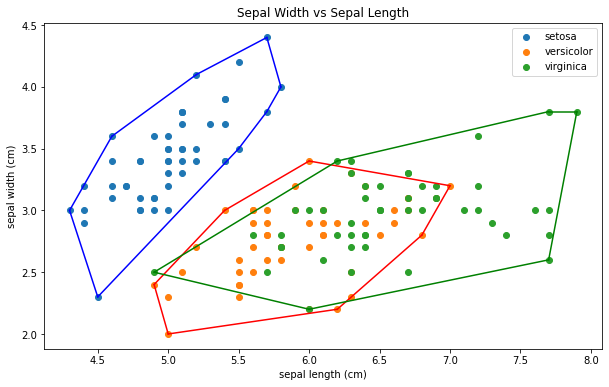

In [4]:
# Data Iris Sepal Width vs Sepal Length
data_iris = datasets.load_iris()
# create a DataFrame
df = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
df['Target'] = pd.DataFrame(data_iris.target)
# visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data_iris.feature_names[0])
plt.ylabel(data_iris.feature_names[1])
for i in range(len(data_iris.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  simplices = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data_iris.target_names[i])
  for simplex in simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

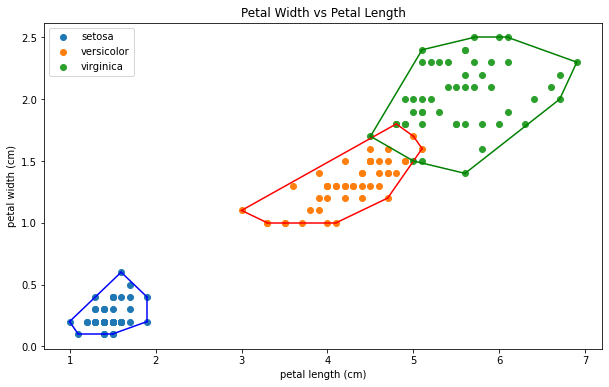

In [5]:
# Data Iris Petal Width vs Petal Length
# visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data_iris.feature_names[2])
plt.ylabel(data_iris.feature_names[3])
for i in range(len(data_iris.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[2,3]].values
  simplices = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data_iris.target_names[i])
  for simplex in simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

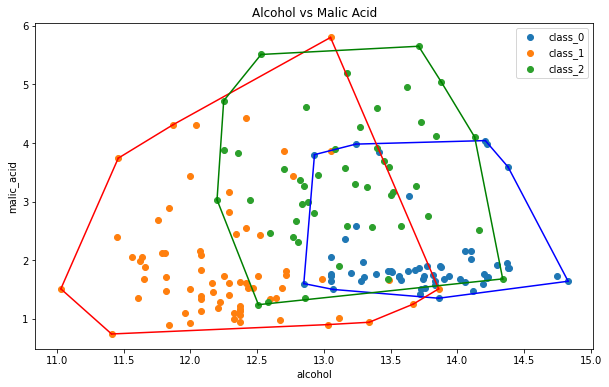

In [6]:
# Data Wine Alcohol vs Malic Acid
data_wine = datasets.load_wine()
# create a DataFrame
df = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
df['Target'] = pd.DataFrame(data_wine.target)
# visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Malic Acid')
plt.xlabel(data_wine.feature_names[0])
plt.ylabel(data_wine.feature_names[1])
for i in range(len(data_wine.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  simplices = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data_wine.target_names[i])
  for simplex in simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

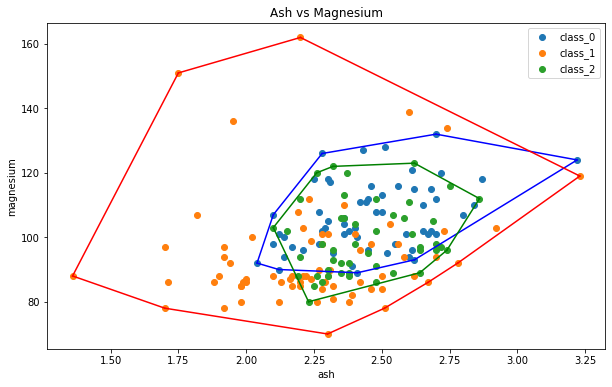

In [7]:
# Data Wine Ash vs Magnesium
# visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Ash vs Magnesium')
plt.xlabel(data_wine.feature_names[2])
plt.ylabel(data_wine.feature_names[4])
for i in range(len(data_wine.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[2,4]].values
  simplices = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data_wine.target_names[i])
  for simplex in simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

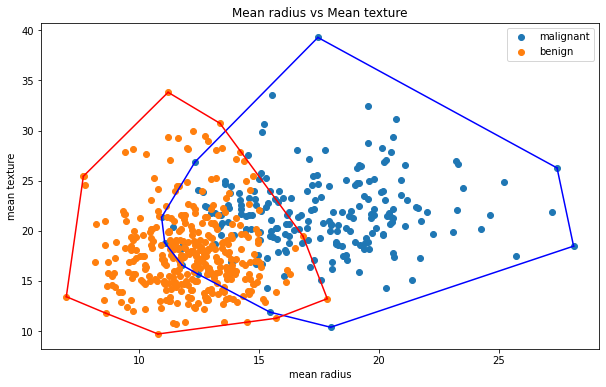

In [8]:
# Data Breast Cancer Mean Radius vs Mean Texture
data_breast_cancer = datasets.load_breast_cancer()
# create a DataFrame
df = pd.DataFrame(data_breast_cancer.data, columns=data_breast_cancer.feature_names)
df['Target'] = pd.DataFrame(data_breast_cancer.target)
# visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean radius vs Mean texture')
plt.xlabel(data_breast_cancer.feature_names[0])
plt.ylabel(data_breast_cancer.feature_names[1])
for i in range(len(data_breast_cancer.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  simplices = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data_breast_cancer.target_names[i])
  for simplex in simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()